In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from seaborn import pairplot

In [321]:
def euclidean_distance(u,v):
    u,v = np.asarray(u),np.asarray(v)
    return np.sqrt(np.sum((u-v)**2,axis=1))

def centroides_update(X,labels,K):
    X,labels = np.asarray(X), np.asarray(labels)
    centroides = np.zeros(shape=(K,X.shape[1]))
    for k in range(0,K):
        centroides[k] = np.mean(X[labels==k],axis=0)
    return centroides

def variancia_intra_cluster(X,labels,centroides,K):
    X,labels = np.asarray(X), np.asarray(labels)
    variancia = 0.0
    for k in range(0,K):
        variancia+=np.sum((X[labels==k]-centroides[k])**2)
    return variancia/X.shape[0]
    

def centroides_update_median(X,labels,K):
    X,labels = np.asarray(X), np.asarray(labels)
    centroides = np.zeros(shape=(K,X.shape[1]))
    for k in range(0,K):
        centroides[k] = np.median(X[labels==k],axis=0)
    return centroides

def Kmeans_clustering(X,K,max_inter,tol):
    X = np.asarray(X)
    labels= np.random.randint(low=0,high=K,size=X.shape[0])
    dist = np.zeros(shape=(K,X.shape[0]))
    
    centroides = centroides_update(X,labels,K)
    
    variancia_ini = variancia_intra_cluster(X,labels,centroides,K)
    
    for i in range(0,max_inter):
        for k in range(0,K):
            dist[k,:] = euclidean_distance(X,centroides[k])
            
        labels_up = dist.argmin(axis=0)
        
        centroides_up = centroides_update_median(X,labels_up,K)
        
        variancia_up = variancia_intra_cluster(X,labels_up,centroides_up,K)
        
        if variancia_ini-variancia_up > tol:
            labels = np.copy(labels_up)
            centroides = np.copy(centroides_up)
            variancia_ini = variancia_up
        else:
            return labels_up
    
    return labels_up

def Kmedians_clustering(X,K,max_inter,tol):
    X = np.asarray(X)
    labels= np.random.randint(low=0,high=K,size=X.shape[0])
    dist = np.zeros(shape=(K,X.shape[0]))
    
    centroides = centroides_update_median(X,labels,K)
    
    variancia_ini = variancia_intra_cluster(X,labels,centroides,K)
    
    for i in range(0,max_inter):
        for k in range(0,K):
            dist[k,:] = euclidean_distance(X,centroides[k])
            
        labels_up = dist.argmin(axis=0)
        
        centroides_up = centroides_update_median(X,labels_up,K)
        
        variancia_up = variancia_intra_cluster(X,labels_up,centroides_up,K)
        
        if variancia_ini-variancia_up > tol:
            labels = np.copy(labels_up)
            centroides = np.copy(centroides_up)
            variancia_ini = variancia_up
        else:
            return labels_up
    
    return labels_up

In [322]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data ,columns=iris.feature_names)
df['Target'] = iris.target

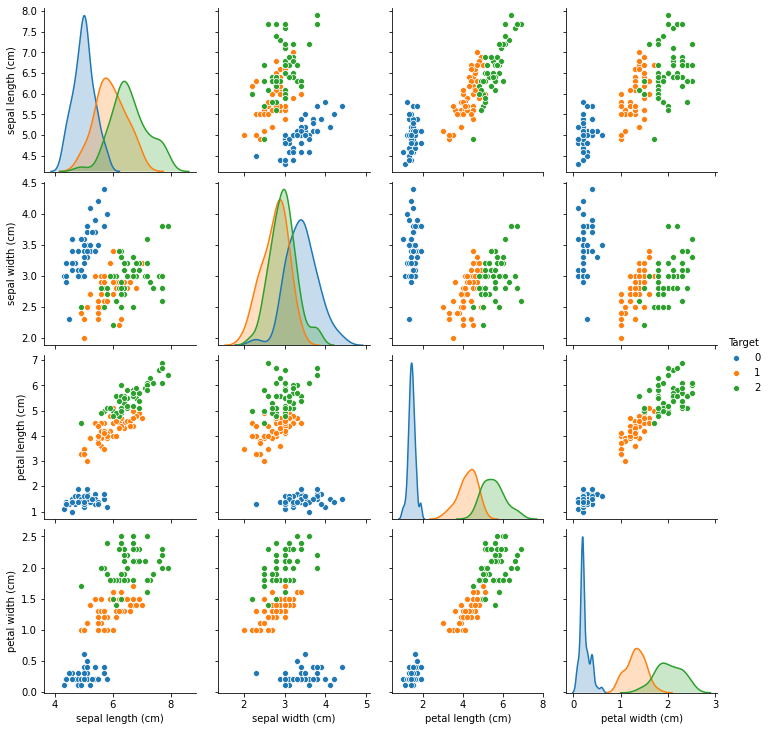

In [323]:
pairplot(df,hue='Target')

In [324]:
from sklearn.preprocessing import StandardScaler

In [325]:
scaler = StandardScaler()
X = scaler.fit_transform(df[df.columns[:4]])

In [326]:
df['labels_Kmeans'] = Kmeans_clustering(X,3,max_inter=30,tol=0.00001)

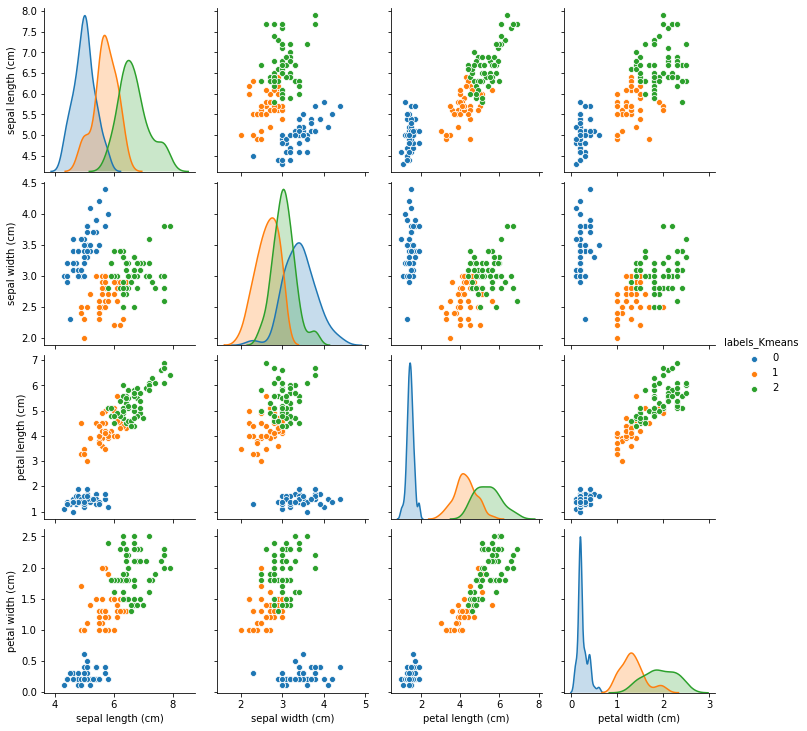

In [327]:
pairplot(df,vars=df.columns[:4],hue='labels_Kmeans')

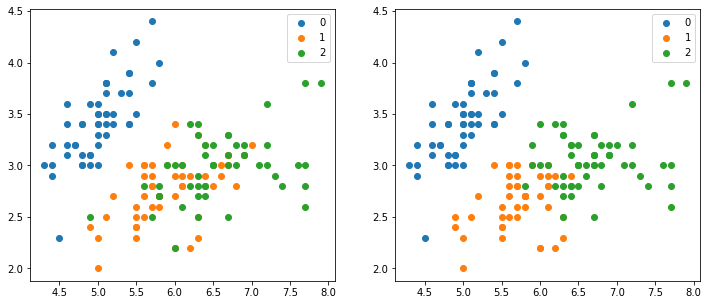

In [335]:
fig,axes = plt.subplots(ncols=2,figsize=(12,5))

col = 'labels_Kmeans'

for i in np.arange(0,3):
    axes[0].scatter(df[df.Target==i][df.columns[0]],df[df.Target==i][df.columns[1]],label=str(i))
    axes[1].scatter(df[df[col]==i][df.columns[0]],df[df[col]==i][df.columns[1]],label=str(i))
    
axes[0].legend()
axes[1].legend()

In [281]:
df['labels_Kmedians'] = Kmedians_clustering(X,3,max_inter=30,tol=0.00001)

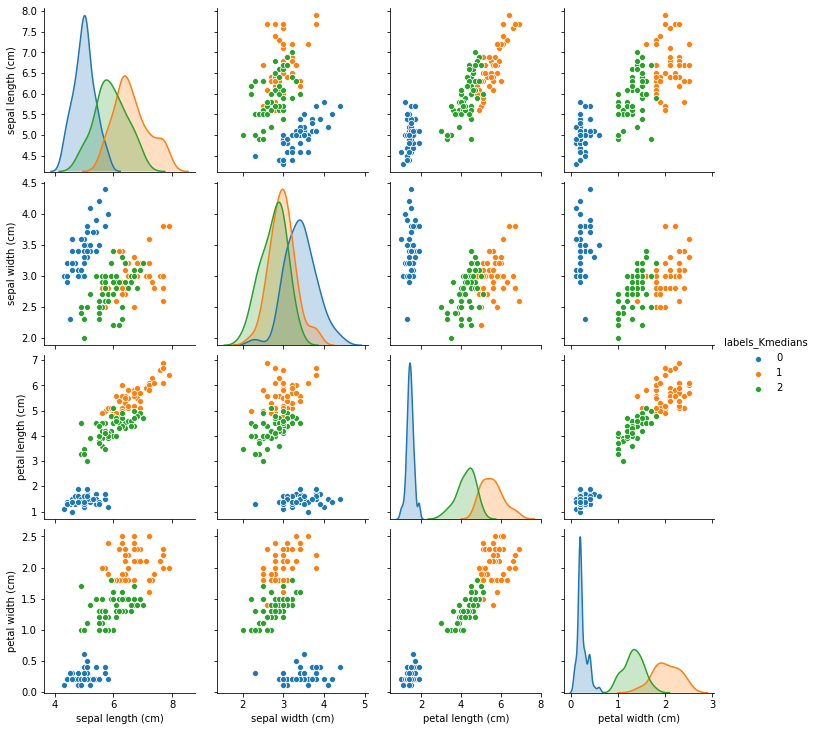

In [282]:
pairplot(df,vars=df.columns[:4],hue='labels_Kmedians')

### Adicionando ruído

In [309]:
ruido = np.abs(np.random.normal(scale=2,size=(10,4)))

In [310]:
ruido

array([[0.96641651, 2.32950254, 2.84621957, 0.64618036],
       [1.63001213, 0.66618805, 3.30632714, 0.70073654],
       [1.15502161, 2.78231414, 0.20977036, 0.43700253],
       [0.60013242, 1.16922732, 0.74502937, 1.54606126],
       [3.57743753, 0.96295695, 0.14941552, 1.63086593],
       [1.73932896, 0.27967516, 0.64840282, 2.63178515],
       [0.54909914, 4.54015204, 0.27962872, 1.04587861],
       [1.28550465, 1.32795436, 3.96388877, 0.27161247],
       [0.62622745, 1.87811721, 2.01785101, 0.51540144],
       [3.25741519, 1.47318726, 3.54924569, 1.25701142]])

In [311]:
df_2 = df[df.columns[:4]]
df_2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [312]:
df_2 = df_2.append(pd.DataFrame(ruido,columns=df_2.columns))

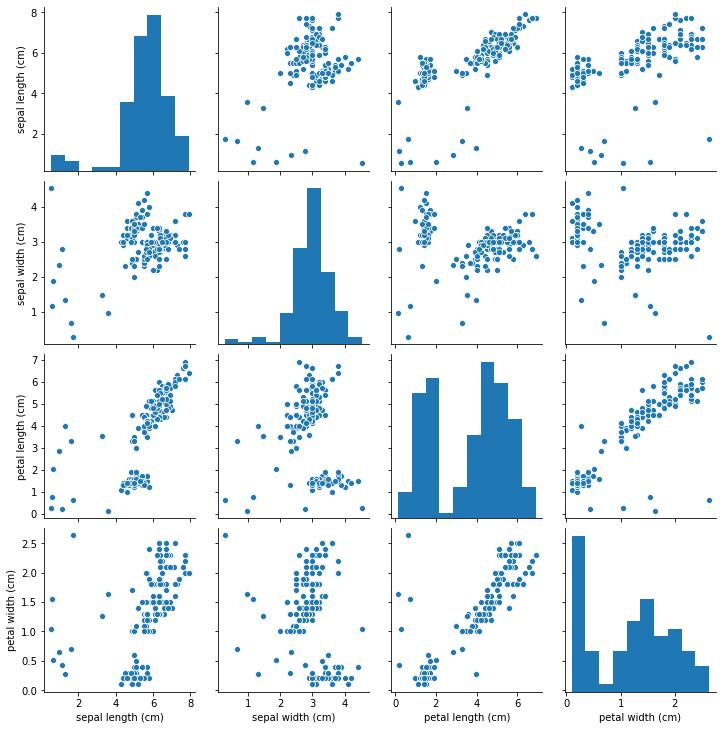

In [313]:
pairplot(df_2,vars=df.columns[:4])

In [315]:
scaler = StandardScaler()
X = scaler.fit_transform(df_2[df_2.columns[:4]])

In [316]:
df_2['labels_Kmeans'] = Kmeans_clustering(X,3,max_inter=30,tol=0.00001)

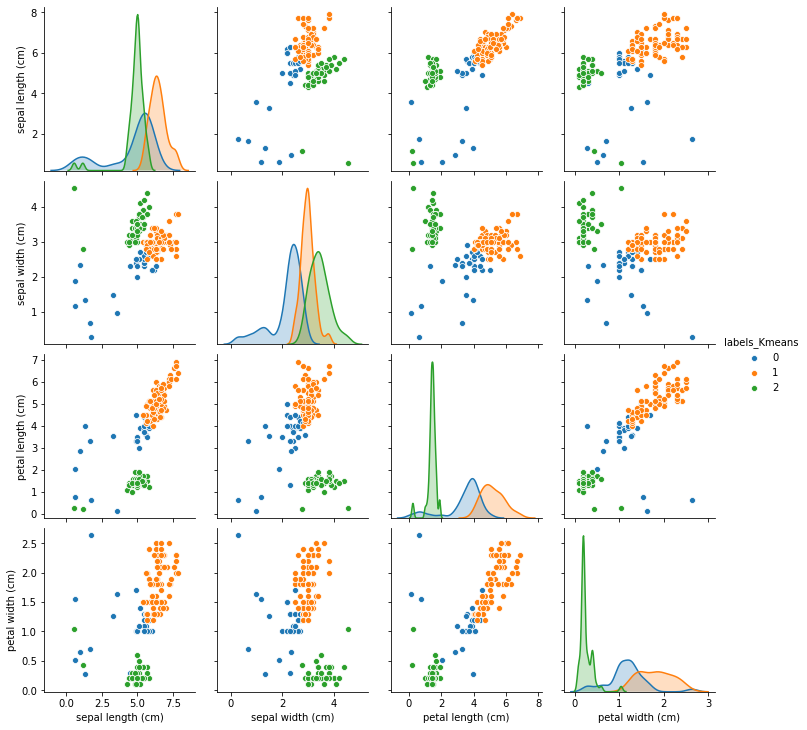

In [317]:
pairplot(df_2,vars=df.columns[:4],hue='labels_Kmeans')

In [318]:
df_2['labels_Kmedians'] = Kmedians_clustering(X,3,max_inter=30,tol=0.00001)

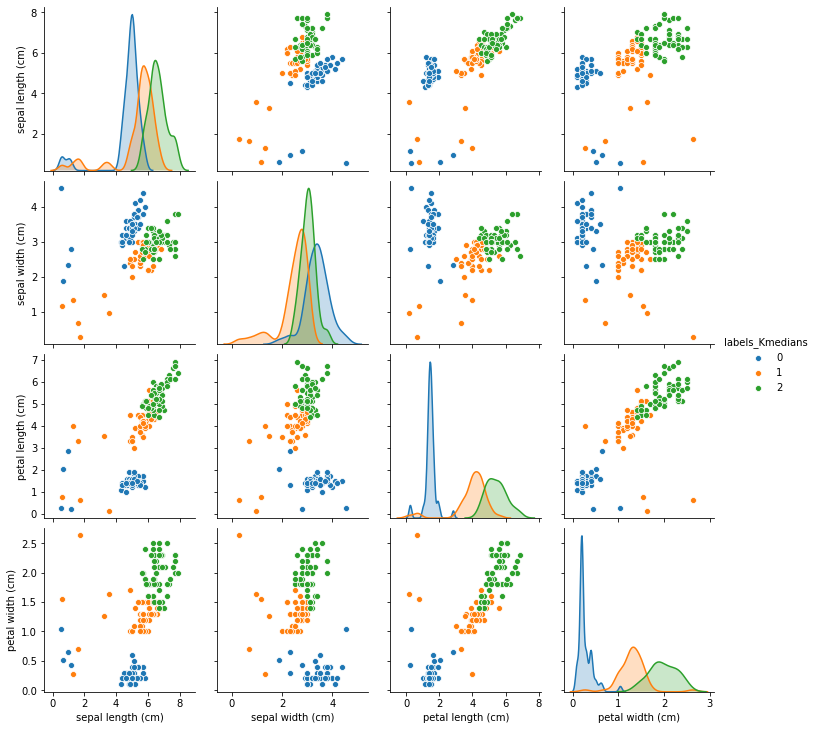

In [319]:
pairplot(df_2,vars=df.columns[:4],hue='labels_Kmedians')